<a href="https://www.kaggle.com/code/averma111/pytorch-pss3e18-vanilla?scriptVersionId=135458599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
ENZYME MULTILABEL CLASIFICATION USING BINARY CLASSIFICATION TECHNIQUE
</p>
</div>

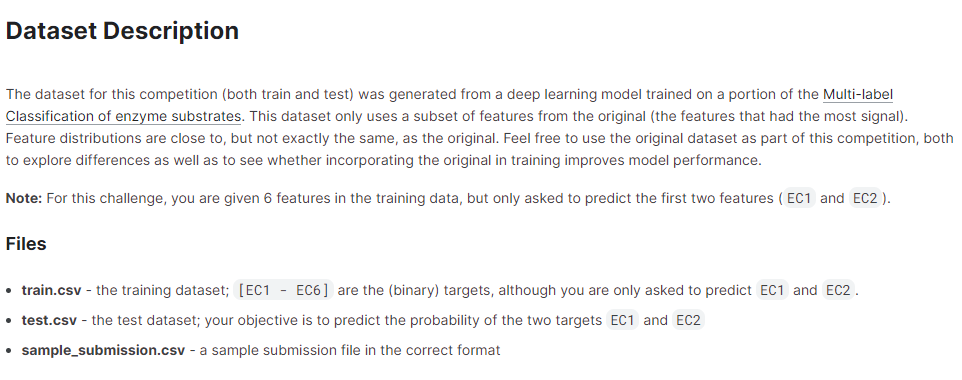

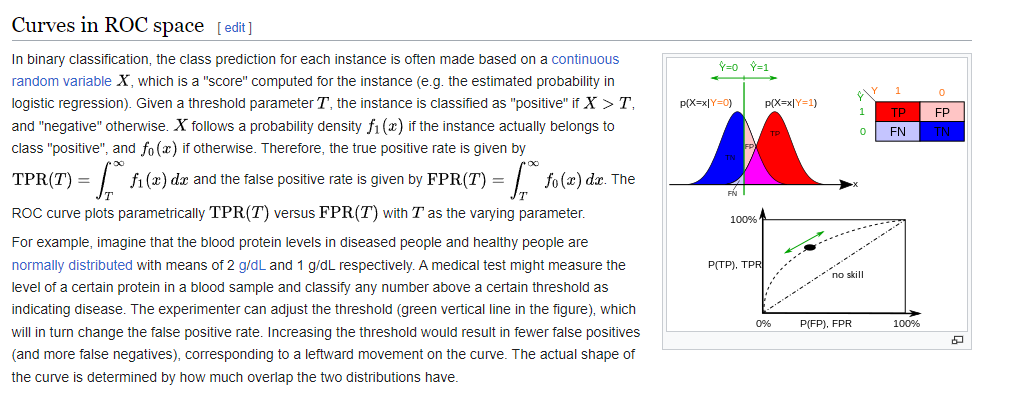

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
DEPENDENT PACAKGES FOR MODELLING
</p>
</div>

In [1]:
%%capture
!pip install ydata-profiling

In [2]:
%%capture
!pip install torchsampler

In [3]:
%%capture
!pip install torchmetrics

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
IMPORTING NECESSARY LIBRARIES 
</p>
</div>

In [4]:

import random
import numpy as np 
import pandas as pd 
import os
import datetime
import seaborn as sns
from tqdm.notebook import tqdm
from ydata_profiling import ProfileReport
from collections import Counter

from imblearn.over_sampling import SMOTE,SMOTEN
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

from torchsampler import ImbalancedDatasetSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F
from torchmetrics import ROC
from torchmetrics.classification import BinaryAccuracy



import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import itertools

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open fi

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
FILE AVAILABLE IN HOME DIRECTORY
</p>
</div>

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
DATA ACQUISITION
</p>
</div>

In [6]:
class Datapreparation(object):
    
    def __init__(self,root_path):
        self.root_path = root_path
        
    def get_dataframe(self,filename):
        return pd.read_csv(os.path.join(self.root_path,filename))
    
    def summary(self,text, df):
        summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary['null'] = df.isnull().sum()
        summary['unique'] = df.nunique()
        summary['min'] = df.min()
        summary['median'] = df.median()
        summary['max'] = df.max()
        summary['mean'] = df.mean()
        summary['std'] = df.std()
        summary['duplicate'] = df.duplicated().sum()
        return summary
    
    
    def random_split_data(self,X,y):
        return train_test_split(X, y,test_size=0.20,random_state=42)

 
    def standardization_data(self,X_data):
        scaler = StandardScaler()
        std_X_data = scaler.fit_transform(X_data)
        return std_X_data
    

    
data = Datapreparation('/kaggle/input/playground-series-s3e18')
train=data.get_dataframe('train.csv')

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRAIN DATA SUMMARY
</p>
</div>

In [7]:
data.summary('train',train)

,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,14838,0.000000,7418.500000,14837.000000,7418.500000,4283.505982,0
BertzCT,float64,0,2368,0.000000,290.987941,4069.959780,515.153604,542.456370,0
Chi1,float64,0,1259,0.000000,6.485270,69.551167,9.135189,6.819989,0
Chi1n,float64,0,3157,0.000000,4.052701,50.174588,5.854307,4.647064,0
Chi1v,float64,0,3306,0.000000,4.392859,53.431954,6.738497,5.866444,0
Chi2n,float64,0,3634,0.000000,2.970427,32.195368,4.432570,3.760516,0
Chi2v,float64,0,3725,0.000000,3.242775,34.579313,5.253221,4.925065,0
Chi3v,float64,0,3448,0.000000,1.948613,22.880836,3.418749,3.436208,0
Chi4n,float64,0,2930,0.000000,1.073261,16.072810,1.773472,1.865898,0
EState_VSA1,float64,0,719,0.000000,17.353601,363.705954,29.202823,31.728679,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRAIN DATA PROFILING USING PROFILEREPORT METHOD
</p>
</div>

In [8]:
#profile = ProfileReport(train, title="Train Data Profiling Report")
#profile

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
SETTING UP FEATURES AND LABELS
</p>
</div>

In [9]:
y1 = train['EC1']
y2 = train['EC2']
train.drop(columns=['id','EC1','EC2','EC3','EC4','EC5','EC6'],axis=1,inplace=True)
X = train.copy()


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
SPLITTING THE TRAIN DATA
</p>
</div>

In [10]:
X_train,X_val,y1_train,y1_val = data.random_split_data(X,y1)
print('Data splits for EC1 \n',X_train.shape,X_val.shape,y1_train.shape,y1_val.shape)

Data splits for EC1 
 (11870, 31) (2968, 31) (11870,) (2968,)


In [11]:
X_train,X_val,y2_train,y2_val = data.random_split_data(X,y2)
print('Data splits for EC2 \n',X_train.shape,X_val.shape,y2_train.shape,y2_val.shape)

Data splits for EC2 
 (11870, 31) (2968, 31) (11870,) (2968,)


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
NORMALIZE TRAIN DATA
</p>
</div>

In [12]:
std_X_train = data.standardization_data(X_train)
std_X_val = data.standardization_data(X_val)
print(std_X_train[0],std_X_val[0])

[-0.6460012  -0.49660398 -0.53250602 -0.57261284 -0.5904852  -0.61753263
 -0.59673579 -0.62771573 -0.91411097  0.56344636 -0.56889535 -0.07305243
  0.81469479  1.50215144  0.0217275  -0.57591696 -0.08736038 -0.39329628
  1.34611003 -0.72802128 -0.78622974 -0.51646882  0.1563295   0.31295018
 -0.61487415 -0.5171512  -0.91283104 -0.93428166 -0.94969081 -0.68328343
 -0.68460195] [-0.73157789 -0.89416128 -0.71611727 -0.71782103 -0.74457679 -0.73521665
 -0.8362178  -0.84437652 -0.385045   -0.76779355 -0.74586676  0.06227215
  0.02884275  0.07397899  0.41849986 -0.75437549 -0.10510849 -0.80384358
  0.35858918 -0.61099998 -0.3717161  -0.33573224 -0.47165217 -0.56987761
 -0.62586121 -0.22583258 -0.54067893 -0.28699515 -0.54836477  0.78492852
  0.78337988]


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TENSOR OPERATIONS
</p>
</div>

In [13]:
class Tensoroperations():
    
    def __init__(self):
        super(Tensoroperations,self).__init__()
    
    def convert_to_tensor(self,X,y=None):
        X_tensor =  torch.from_numpy(X).float()   
        y_tensor = torch.from_numpy(y).float() 
        return X_tensor,y_tensor
        
    def convert_to_test_tensor(self,X):
        X_tensor =  torch.from_numpy(X).float()
        return X_tensor
    
    def get_dataloaders(self,train_dataset,val_dataset):
        train_loaders = DataLoader(train_dataset,batch_size=32,shuffle=True)
        val_loaders = DataLoader(val_dataset,batch_size=32)
        return train_loaders,val_loaders
    
    def get_test_dataloaders(self,test_dataset,X_test):
        test_loaders = DataLoader(test_dataset,batch_size=X_test.shape[0])
        return test_loaders
        
        
    
tenops = Tensoroperations()

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRAIN CUSTOM DATASET
</p>
</div>

In [14]:
class CustomDataset(Dataset):
    
    def __init__(self,X_data,y_data=None,is_train=True):
        super().__init__()
        if is_train:
            self.X_data = X_data
            self.y_data = y_data
        else:
            self.X_data=X_train
            
    def __getitem__(self,index):
        return (self.X_data[index],self.y_data[index])
    
    def __len__(self):
        return len(self.X_data)

In [15]:
X_tensor_train,y1_tensor_train = tenops.convert_to_tensor(std_X_train,y1_train.values)
X_tensor_val,y1_tensor_val = tenops.convert_to_tensor(std_X_val,y1_val.values)
print('The training tensor for EC1\n',X_tensor_train,y1_tensor_train)
print('The validation tensor for EC1\n',X_tensor_val,y1_tensor_val)

The training tensor for EC1
 tensor([[-0.6460, -0.4966, -0.5325,  ..., -0.9497, -0.6833, -0.6846],
        [-0.7818, -0.9513, -0.8922,  ..., -1.0127,  0.8178,  0.8161],
        [ 2.1245,  1.5223,  1.7448,  ...,  2.0297, -0.6833, -0.6846],
        ...,
        [-0.2776,  0.0232, -0.3406,  ..., -0.6133, -0.6833, -0.6846],
        [-0.7166, -0.6467, -0.5530,  ..., -0.6577, -0.6833, -0.6846],
        [-0.8225, -0.8068, -0.8795,  ..., -0.8180, -0.6833, -0.6846]]) tensor([1., 1., 1.,  ..., 0., 0., 1.])
The validation tensor for EC1
 tensor([[-0.7316, -0.8942, -0.7161,  ..., -0.5484,  0.7849,  0.7834],
        [-0.2605,  0.2136,  0.2536,  ..., -0.2027, -0.6970, -0.6985],
        [-0.4432, -1.0872, -1.1129,  ..., -0.1914,  2.2669,  2.2653],
        ...,
        [-0.6615, -0.6798, -0.6762,  ..., -0.3160,  0.7849,  0.7834],
        [ 0.7218,  0.9378,  0.8351,  ...,  0.2456, -0.6970, -0.6985],
        [-0.8259, -0.8942, -0.8957,  ..., -0.9963, -0.6970, -0.6985]]) tensor([1., 0., 1.,  ..., 1., 0.,

In [16]:
X_tensor_train,y2_tensor_train = tenops.convert_to_tensor(std_X_train,y2_train.values)
X_tensor_val,y2_tensor_val = tenops.convert_to_tensor(std_X_val,y2_val.values)
print('The training tensor EC2\n',X_tensor_train,y2_tensor_train)
print('The validation tensor Ec2\n',X_tensor_val,y2_tensor_val)

The training tensor EC2
 tensor([[-0.6460, -0.4966, -0.5325,  ..., -0.9497, -0.6833, -0.6846],
        [-0.7818, -0.9513, -0.8922,  ..., -1.0127,  0.8178,  0.8161],
        [ 2.1245,  1.5223,  1.7448,  ...,  2.0297, -0.6833, -0.6846],
        ...,
        [-0.2776,  0.0232, -0.3406,  ..., -0.6133, -0.6833, -0.6846],
        [-0.7166, -0.6467, -0.5530,  ..., -0.6577, -0.6833, -0.6846],
        [-0.8225, -0.8068, -0.8795,  ..., -0.8180, -0.6833, -0.6846]]) tensor([1., 1., 0.,  ..., 1., 1., 1.])
The validation tensor Ec2
 tensor([[-0.7316, -0.8942, -0.7161,  ..., -0.5484,  0.7849,  0.7834],
        [-0.2605,  0.2136,  0.2536,  ..., -0.2027, -0.6970, -0.6985],
        [-0.4432, -1.0872, -1.1129,  ..., -0.1914,  2.2669,  2.2653],
        ...,
        [-0.6615, -0.6798, -0.6762,  ..., -0.3160,  0.7849,  0.7834],
        [ 0.7218,  0.9378,  0.8351,  ...,  0.2456, -0.6970, -0.6985],
        [-0.8259, -0.8942, -0.8957,  ..., -0.9963, -0.6970, -0.6985]]) tensor([1., 1., 1.,  ..., 1., 1., 1.])


In [17]:
false_pos,true_pos = [],[]

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRAINING AND VALIDATION STEPS WITH BINARY ACCURACY
</p>
</div>

In [18]:
class EnzymeClassificationBase(torch.nn.Module):
    
    def _accuracy(self,outputs, labels):
        #return torch.tensor(outputs.round() == labels).float().mean()
        metric = BinaryAccuracy()
        return metric(outputs, labels.unsqueeze(1))
    
    
    def training_step(self,batch):
        features,labels = batch
        out = self(features)
        loss = F.binary_cross_entropy(out,labels.unsqueeze(1))
        return loss
    
    def validation_step(self, batch):
        features, labels = batch 
        out = self(features)                    # Generate predictions
        loss = F.binary_cross_entropy(out, labels.unsqueeze(1))   # Calculate loss
        acc = self._accuracy(out, labels)           # Calculate accuracy
        self._get_roc(out, labels)
        return {'Validation_loss': loss.detach(), 'Validation_acc': acc}
    
    def _get_roc(self,output,labels):
        roc = ROC(task="binary")
        fpr, tpr, thresholds = roc(output, (labels.long()).unsqueeze(1))
        false_pos.append(fpr)
        true_pos.append(tpr)
        
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['Validation_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['Validation_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'Validation_loss': epoch_loss.item(), 'Validation_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        if epoch%10 == 0:
            print("Epoch [{}], Train_loss: {:.4f}, Validation_loss: {:.4f}, Validation_acc: {:.4f}".format(
                epoch, result['Train_loss'], result['Validation_loss'], result['Validation_acc']))

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
THE MODEL
</p>
</div>

In [19]:
n_input_dim = X_train.shape[1]
n_output =  1   # Number of output nodes = for binary classifier

class MultiClassificationNN(EnzymeClassificationBase):
    
    def __init__(self):
        super(MultiClassificationNN, self).__init__()
        
        self.network = torch.nn.Sequential(
            torch.nn.Linear(n_input_dim,32),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(32,16),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(16,8),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(8,n_output),
            torch.nn.Sigmoid()
        )
    
    def forward(self, xb):
        return self.network(xb)


model_EC1 = MultiClassificationNN()
model_EC2 = MultiClassificationNN()

In [20]:
print(model_EC1)

MultiClassificationNN(
  (network): Sequential(
    (0): Linear(in_features=31, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [21]:
print(model_EC2)

MultiClassificationNN(
  (network): Sequential(
    (0): Linear(in_features=31, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
PREPARING THE TRAIN AND VALIDATION DATA LOADERS
</p>
</div>

In [22]:
train1_dataset = CustomDataset(X_tensor_train,y1_tensor_train)
val1_dataset = CustomDataset(X_tensor_val,y1_tensor_val)

train2_dataset = CustomDataset(X_tensor_train,y2_tensor_train)
val2_dataset = CustomDataset(X_tensor_val,y2_tensor_val)

In [23]:
train_dataloader = DataLoader(train1_dataset,64,shuffle=True)
val_dataloader = DataLoader(val1_dataset,64)

In [24]:
train_dataloader2 = DataLoader(train2_dataset,64,shuffle=True)
val_dataloader2 = DataLoader(val2_dataset,64)

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
CLASS TARINER
</p>
</div>

In [26]:
class Trainer:
    
    @torch.no_grad()
    def _evaluate(self,model, val_loader):
        model.eval()
        outputs = [model.validation_step(batch) for batch in val_loader]
        return model.validation_epoch_end(outputs)

  
    def fit(self,epochs, lr, model, train_loader, val_loader, opt_func):
    
        history = []
        optimizer = opt_func(model.parameters(),lr)
        for epoch in tqdm(range(epochs)):
        
            model.train()
            train_losses = []
            for batch in train_loader:
                loss = model.training_step(batch)
                train_losses.append(loss)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            
            result = self._evaluate(model, val_loader)
            result['Train_loss'] = torch.stack(train_losses).mean().item()
            model.epoch_end(epoch, result)
            history.append(result)
    
        return history

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
HYPER PARAMETERS
</p>
</div>

In [27]:
num_epochs=100
lr=1e-4
opt_func= torch.optim.Adam

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC1 TRAINING
</p>
</div>

In [28]:
tariner=Trainer()
history_EC1 = tariner.fit(num_epochs, lr, model_EC1, train_dataloader, val_dataloader, opt_func)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [0], Train_loss: 0.7060, Validation_loss: 0.6898, Validation_acc: 0.4959
Epoch [10], Train_loss: 0.5836, Validation_loss: 0.5758, Validation_acc: 0.7038
Epoch [20], Train_loss: 0.5804, Validation_loss: 0.5734, Validation_acc: 0.7076
Epoch [30], Train_loss: 0.5782, Validation_loss: 0.5724, Validation_acc: 0.7029
Epoch [40], Train_loss: 0.5766, Validation_loss: 0.5713, Validation_acc: 0.7039
Epoch [50], Train_loss: 0.5750, Validation_loss: 0.5711, Validation_acc: 0.7029
Epoch [60], Train_loss: 0.5738, Validation_loss: 0.5711, Validation_acc: 0.7026
Epoch [70], Train_loss: 0.5729, Validation_loss: 0.5710, Validation_acc: 0.7026
Epoch [80], Train_loss: 0.5720, Validation_loss: 0.5714, Validation_acc: 0.6999
Epoch [90], Train_loss: 0.5713, Validation_loss: 0.5713, Validation_acc: 0.7009


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC1 ACCURACY PLOT
</p>
</div>

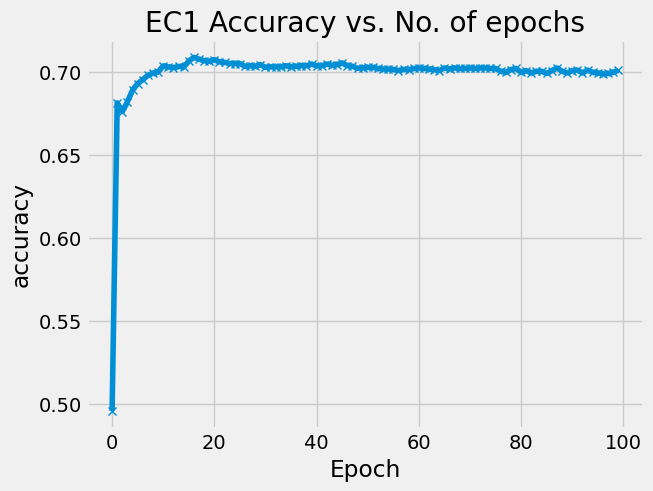

In [29]:
def plot_accuracies(history_EC1):
    """ Plot the history of accuracies"""
    accuracies = [x['Validation_acc'] for x in history_EC1]
    plt.plot(accuracies, '-x')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.title('EC1 Accuracy vs. No. of epochs');
    
plot_accuracies(history_EC1)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC1 LOSS VS EPOCHS
</p>
</div>

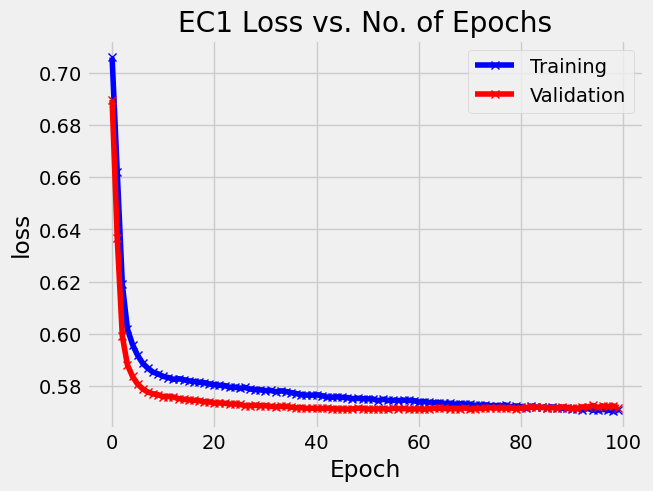

In [30]:
def plot_losses(history_EC1):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('Train_loss') for x in history_EC1]
    val_losses = [x['Validation_loss'] for x in history_EC1]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('EC1 Loss vs. No. of Epochs')

plot_losses(history_EC1)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
AUC ROC EC1
</p>
</div>

In [56]:
fpr,tpr =[],[]
for i in range(len(false_pos)):
        fpr.append(np.mean(false_pos[i].tolist()))

for j in range(len(true_pos)):
        tpr.append(np.mean(false_pos[j].tolist()))


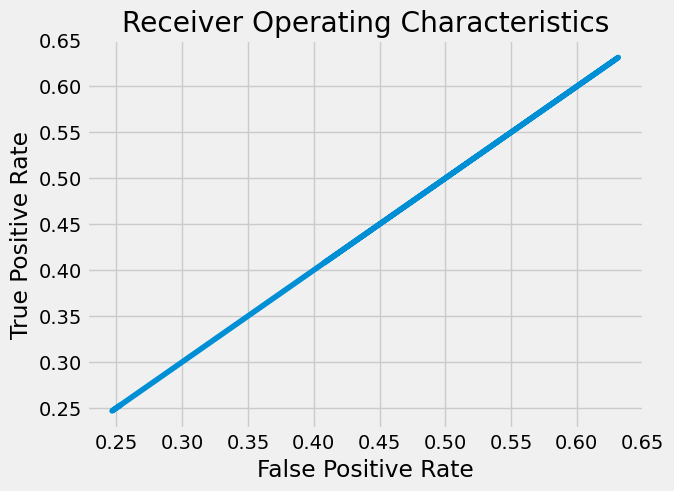

In [58]:
with torch.no_grad():
    plt.plot(fpr,tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()



<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC2 TRANING
</p>
</div>

In [59]:
history_EC2 = tariner.fit(num_epochs, lr, model_EC2, train_dataloader2, val_dataloader2, opt_func)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [0], Train_loss: 0.6331, Validation_loss: 0.6081, Validation_acc: 0.8090
Epoch [10], Train_loss: 0.5017, Validation_loss: 0.4861, Validation_acc: 0.8090
Epoch [20], Train_loss: 0.4990, Validation_loss: 0.4836, Validation_acc: 0.8090
Epoch [30], Train_loss: 0.4977, Validation_loss: 0.4832, Validation_acc: 0.8090
Epoch [40], Train_loss: 0.4967, Validation_loss: 0.4828, Validation_acc: 0.8090
Epoch [50], Train_loss: 0.4957, Validation_loss: 0.4832, Validation_acc: 0.8090
Epoch [60], Train_loss: 0.4954, Validation_loss: 0.4829, Validation_acc: 0.8090
Epoch [70], Train_loss: 0.4945, Validation_loss: 0.4833, Validation_acc: 0.8090
Epoch [80], Train_loss: 0.4939, Validation_loss: 0.4832, Validation_acc: 0.8090
Epoch [90], Train_loss: 0.4937, Validation_loss: 0.4832, Validation_acc: 0.8090


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC2 ACCURACY
</p>
</div>

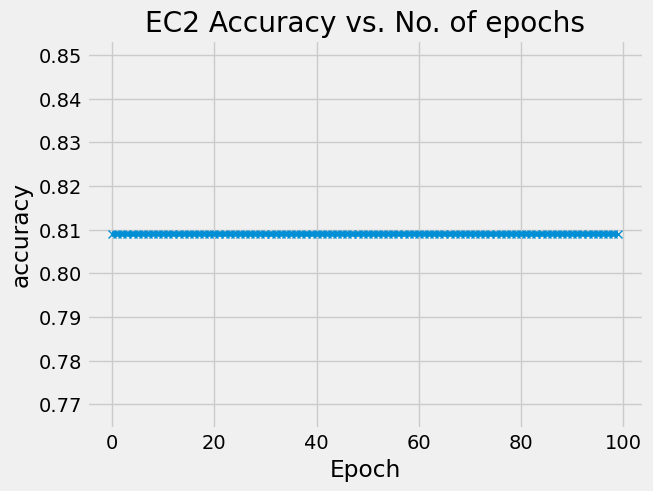

In [60]:
def plot_accuracies(history_EC2):
    """ Plot the history of accuracies"""
    accuracies = [x['Validation_acc'] for x in history_EC2]
    plt.plot(accuracies, '-x')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.title('EC2 Accuracy vs. No. of epochs');
    
plot_accuracies(history_EC2)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EC2 LOSS VS EPOCHS
</p>
</div>

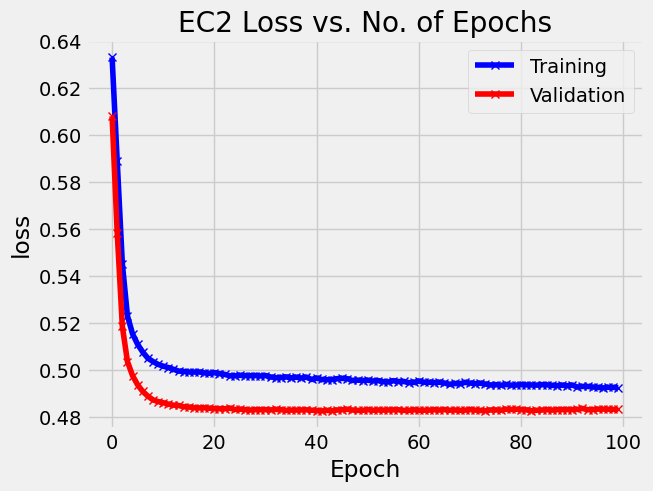

In [61]:
def plot_losses(history_EC2):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('Train_loss') for x in history_EC2]
    val_losses = [x['Validation_loss'] for x in history_EC2]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('EC2 Loss vs. No. of Epochs')

plot_losses(history_EC2)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
AUC ROC EC2
</p>
</div>

In [62]:
fpr,tpr =[],[]
for i in range(len(false_pos)):
        fpr.append(np.mean(false_pos[i].tolist()))

for j in range(len(true_pos)):
        tpr.append(np.mean(false_pos[j].tolist()))


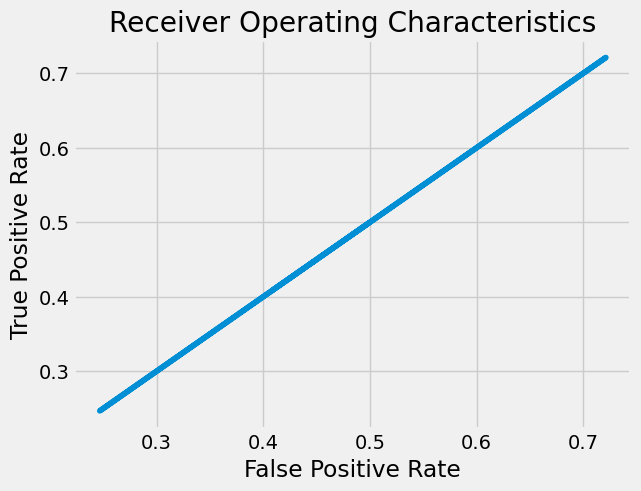

In [63]:

with torch.no_grad():
    plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST DATA ACQISITION
</p>
</div>

In [64]:
test=data.get_dataframe('test.csv')

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST DATA SUMMARY
</p>
</div>

In [65]:
data.summary('test',test)

,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,9893,14838.000000,19784.000000,24730.000000,19784.000000,2856.007440,0
BertzCT,float64,0,1811,0.000000,289.901774,3919.541449,516.411916,544.327795,0
Chi1,float64,0,1047,0.000000,6.447265,53.876516,9.106998,6.754583,0
Chi1n,float64,0,2473,0.000000,4.009996,43.283925,5.848047,4.641662,0
Chi1v,float64,0,2604,0.000000,4.337841,53.990574,6.733659,5.863886,0
Chi2n,float64,0,2806,0.000000,2.930013,36.368883,4.428979,3.770031,0
Chi2v,float64,0,2858,0.000000,3.168052,44.726398,5.247994,4.939702,0
Chi3v,float64,0,2644,0.000000,1.923982,26.736931,3.401083,3.431766,0
Chi4n,float64,0,2249,0.000000,1.058931,15.620667,1.750078,1.837159,0
EState_VSA1,float64,0,582,0.000000,17.282269,363.705954,28.956335,31.470865,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST DATA PROFILING REPORT
</p>
</div>

In [66]:
#profile_test = ProfileReport(test, title="Test Data Profiling Report")
#profile_test

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST FEATURES
</p>
</div>

In [67]:
test_update = test.loc[:, test.columns != 'id']
std_X_test = data.standardization_data(test_update)
std_X_test[0]

array([-0.31559702, -0.26996293, -0.29604713, -0.15326805, -0.26969872,
       -0.12075512, -0.38015134, -0.34492222,  0.65150045, -0.76517602,
       -0.39138395,  0.28708683,  0.17578552,  0.00940321,  1.04728953,
       -0.38804569, -0.05445579, -0.19503344, -1.27986015, -0.2075983 ,
        0.52346399, -0.13900777, -0.46065274, -0.56072839, -0.62994368,
        0.60218712, -0.19027332, -0.59956194, -0.0718545 ,  0.79849656,
        0.7956248 ])

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
NORMALIZE TEST DATA
</p>
</div>

In [68]:
X_tensor_test = tenops.convert_to_test_tensor(std_X_test)
X_tensor_test[0]

tensor([-0.3156, -0.2700, -0.2960, -0.1533, -0.2697, -0.1208, -0.3802, -0.3449,
         0.6515, -0.7652, -0.3914,  0.2871,  0.1758,  0.0094,  1.0473, -0.3880,
        -0.0545, -0.1950, -1.2799, -0.2076,  0.5235, -0.1390, -0.4607, -0.5607,
        -0.6299,  0.6022, -0.1903, -0.5996, -0.0719,  0.7985,  0.7956])

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
CUSTOM DATASET FOR TEST
</p>
</div>

In [69]:
class CustomDataTest(Dataset):
    def __init__(self, X_data):
        self.X_data = X_data

        
    def __getitem__(self, index):
            return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [70]:
test_dataset = CustomDataTest(X_tensor_test)
test_dataloader = DataLoader(test_dataset,64)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
MODEL EVALUATION FROM TEST DATA FOR EC1 AND EC2
</p>
</div>

In [71]:
class Evaluate:
        
    def eval_test_data(self,model,test_data_dl):
        age_target = []
        model.eval()
        with torch.no_grad():
            for X_batch_test in test_data_dl:
                X_batch_test = X_batch_test.to(device)
                y_test_pred = model(X_batch_test)
                y_pred_tag = torch.sigmoid(y_test_pred)
                age_target.append(y_pred_tag.cpu())
        return [a.squeeze().tolist() for a in age_target]
    
    
eva = Evaluate()

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
FLATTENING THE EC1 AND EC2 TENSORS
</p>
</div>

In [72]:
from collections.abc import Iterable
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
            yield item
            
ec1 = eva.eval_test_data(model_EC1,test_dataloader)
ec2 = eva.eval_test_data(model_EC2,test_dataloader)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
THE SUBMISSIONS
</p>
</div>

In [73]:
class Submit:
    
    def submit_predictions(self):        
        df_submit = pd.DataFrame(data={'id': test['id'],'EC1':  list(flatten(ec1)),'EC2':list(flatten(ec2))})
        df_submit.to_csv('submission.csv',index=False)
        print('Submission Completed!!')
        return df_submit
        
        
submit = Submit()
df_submit=submit.submit_predictions()

Submission Completed!!


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#1e07eb;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
SUMISSION DATAFRAME
</p>
</div>

In [74]:
df_submit

,id,EC1,EC2
0,14838,0.608402,0.682617
1,14839,0.703340,0.697223
2,14840,0.691433,0.677764
3,14841,0.678588,0.700377
4,14842,0.686364,0.689188
...,...,...,...
9888,24726,0.660209,0.688608
9889,24727,0.694142,0.706882
9890,24728,0.600354,0.695611
9891,24729,0.580715,0.699743
